## Project Name: Heart Attack Risk Predictor

### We will do the following things:
- Data Analysis 
- Feature Engineering 
- Satandardization
- Model Building
- Predictions

### Let us import the necessary liabraries and read our DataSet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let us import our Data Set


In [2]:
df= pd.read_csv("heart.csv")
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [3]:
df= df.drop(['oldpeak','slp','thall'],axis=1)

In [4]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  caa  output
0   63    1   3     145   233    1        0       150     0    0       1
1   37    1   2     130   250    0        1       187     0    0       1
2   41    0   1     130   204    0        0       172     0    0       1
3   56    1   1     120   236    0        1       178     0    0       1
4   57    0   0     120   354    0        1       163     1    0       1

### Data Analysis

### Understanding our DataSet:

#### Age : Age of the patient

#### Sex : Sex of the patient

#### exng: exercise induced angina (1 = yes; 0 = no)

#### caa: number of major vessels (0-3)

#### cp : Chest Pain type

- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

#### trtbps : resting blood pressure (in mm Hg)

#### chol : cholestoral in mg/dl fetched via BMI sensor

#### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

#### restecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

#### thalachh : maximum heart rate achieved

#### target : 0= less chance of heart attack 1= more chance of heart attack

In [5]:
df.shape

(303, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalachh  303 non-null    int64
 8   exng      303 non-null    int64
 9   caa       303 non-null    int64
 10  output    303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

#### As we can see there are no null values in our Data Set

In [8]:
df.corr()

age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
output   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg  thalachh      exng       caa    output  
age      -0.116211 -0.398522  0.096801  0.276326 -0.225439  
sex      -0.058196 -0.044020  0.141664  0.118261 -0.280937  
cp        0.044421  0.295762 -0.394280 -0.181053  0.433798  
trtbps   -0.114103 -0.046698  0.067616  0.101389 -0.144931  
chol     -0.151040 -0.009940  0.067023  0.070511 -0.085239  
fbs      -0.084189 -0.008567  0.025665  0.137979 -0.028046  
restecg   1.000000  0.044123 -0.070733 -0.072042  0.137230  
thalachh  0.044123  1.000000 -0.378812 -0.213177  0.421741  
exng     -0.070733 -0.378812  1.000000  0.115739 -0.436757  
caa      -0.072042 -0.213177  0.115739  1.000000 -0.391724  
output    0.137230  0.421741 -0.436757 -0.391724  1.000000

<AxesSubplot:>

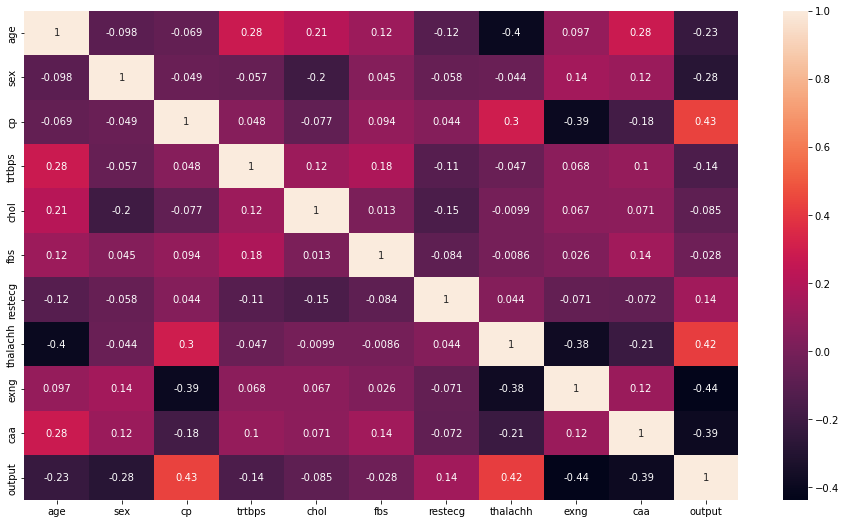

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

#### As we can see our variables are not highly correlated to each other 

#### We will do Uni and Bi variate analysis on our Features

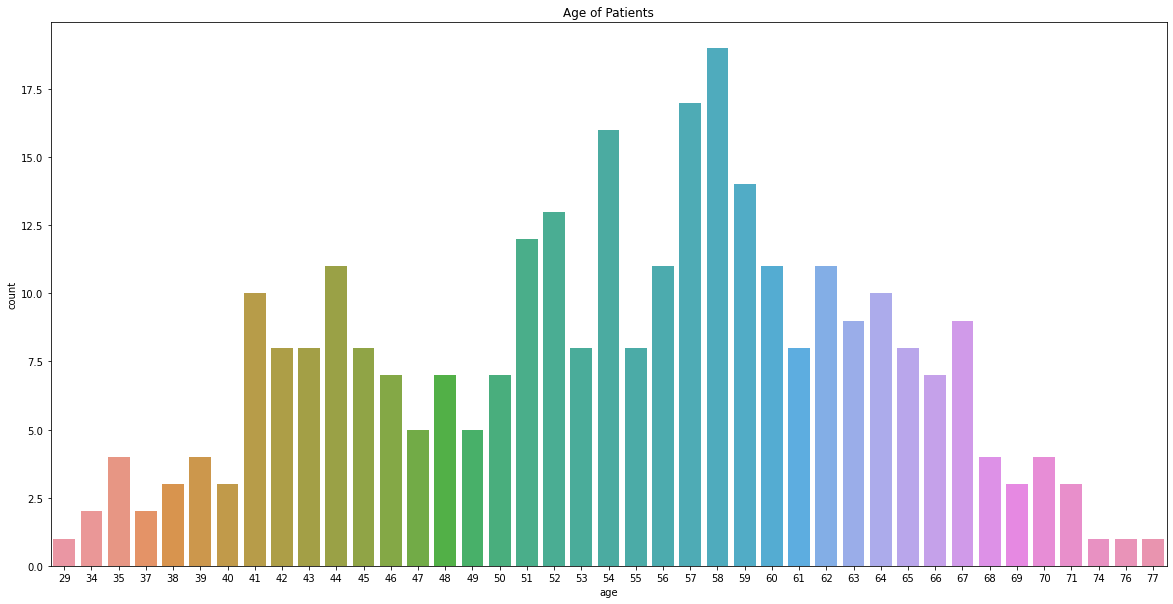

In [10]:
plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df)
plt.show()

#### As we can see the Patients are of Age Group 51-67years in majority

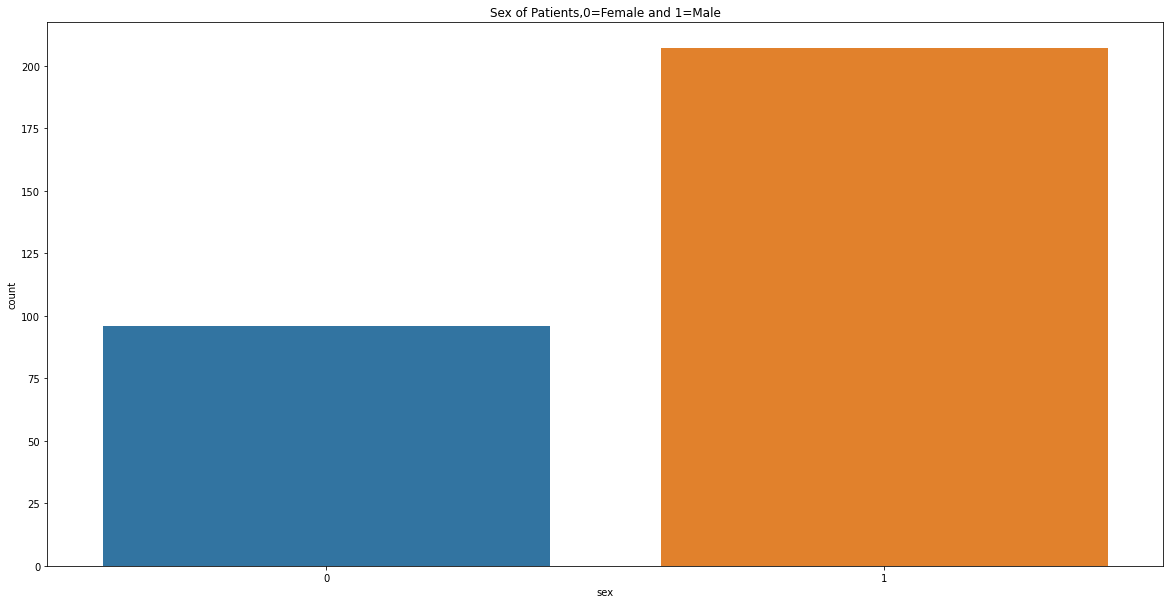

In [11]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients,0=Female and 1=Male")

sns.countplot(x='sex',data=df)
plt.show()

In [12]:
cp_data= df['cp'].value_counts().reset_index()
cp_data['index'][3]= 'asymptomatic'
cp_data['index'][2]= 'non-anginal'
cp_data['index'][1]= 'Atyppical Anigma'
cp_data['index'][0]= 'Typical Anigma'
cp_data

index   cp
0    Typical Anigma  143
1  Atyppical Anigma   87
2       non-anginal   50
3      asymptomatic   23

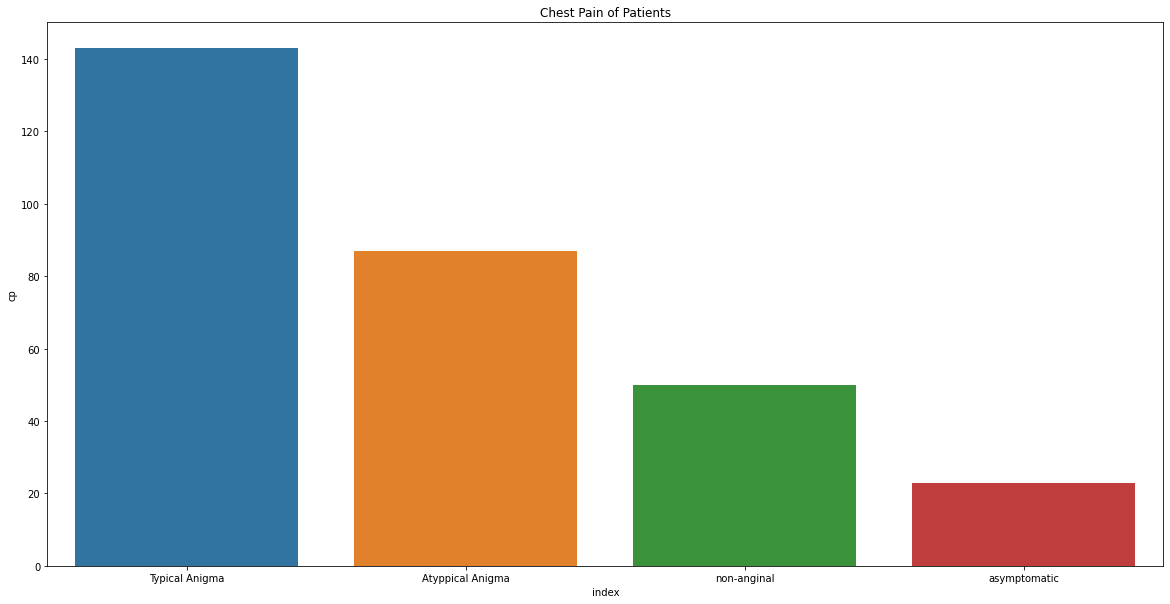

In [13]:
plt.figure(figsize=(20, 10))
plt.title("Chest Pain of Patients")

sns.barplot(x=cp_data['index'],y= cp_data['cp'])
plt.show()

#### We have seen how the the Chest Pain Category is distributed

In [14]:
ecg_data= df['restecg'].value_counts().reset_index()
ecg_data['index'][0]= 'normal'
ecg_data['index'][1]= 'having ST-T wave abnormality'
ecg_data['index'][2]= 'showing probable or definite left ventricular hypertrophy by Estes'

ecg_data

index  restecg
0                                             normal      152
1                       having ST-T wave abnormality      147
2  showing probable or definite left ventricular ...        4

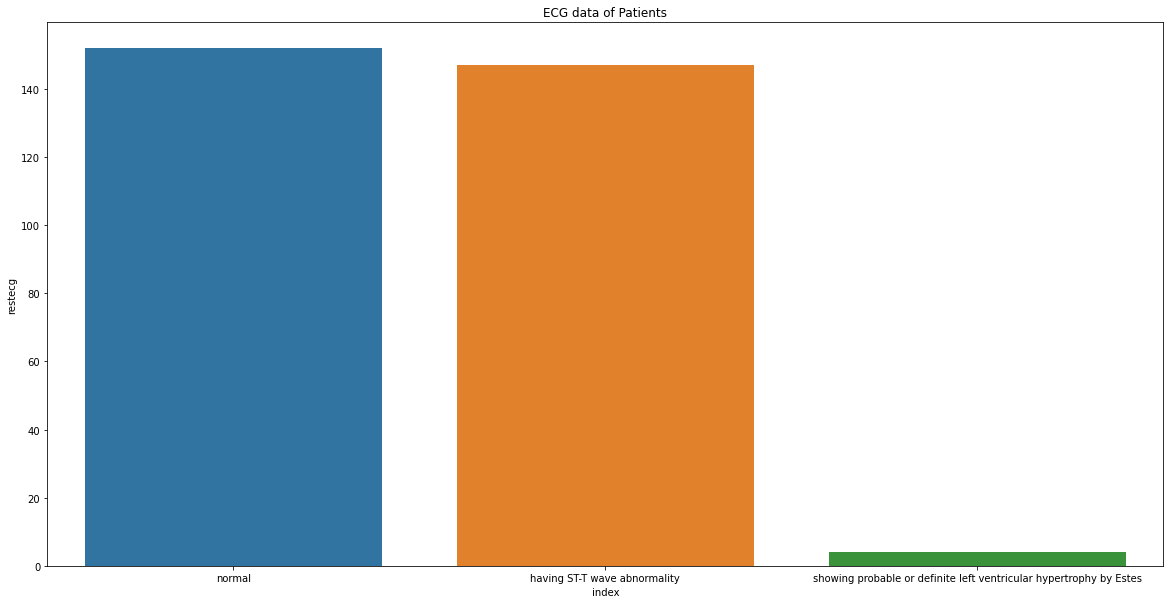

In [15]:
plt.figure(figsize=(20, 10))
plt.title("ECG data of Patients")

sns.barplot(x=ecg_data['index'],y= ecg_data['restecg'])
plt.show()

#### This is our ECG Data 

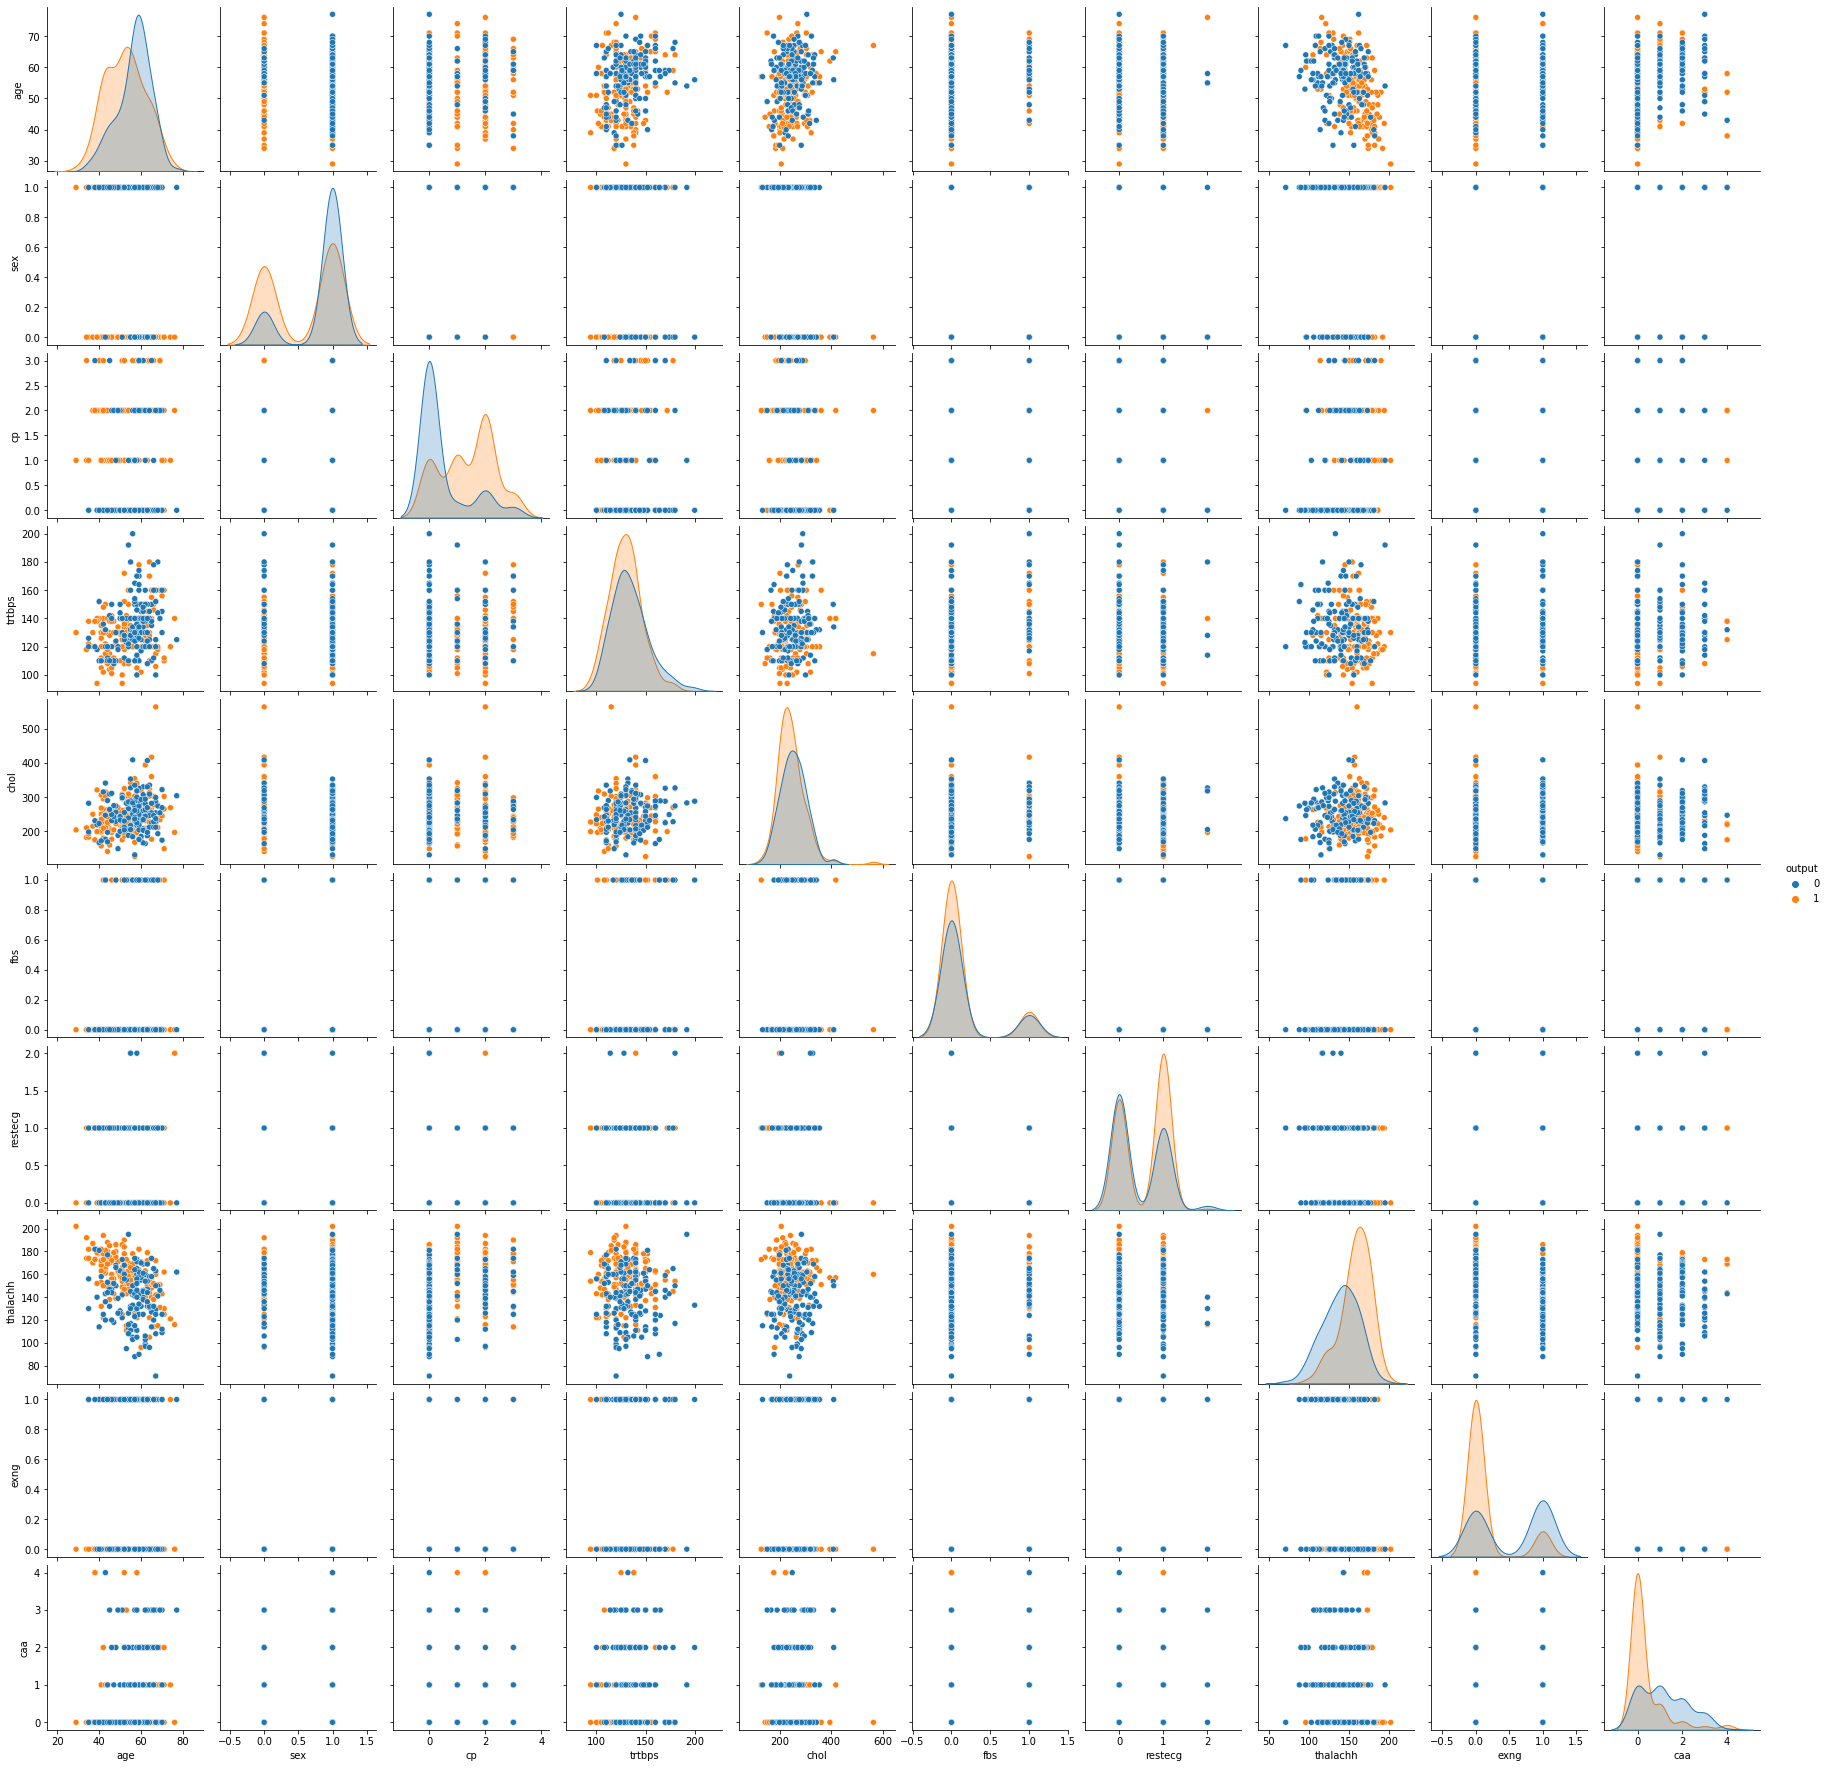

In [16]:
sns.pairplot(df,hue='output',data=df)

### Let us see for our Continuous Variable

Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

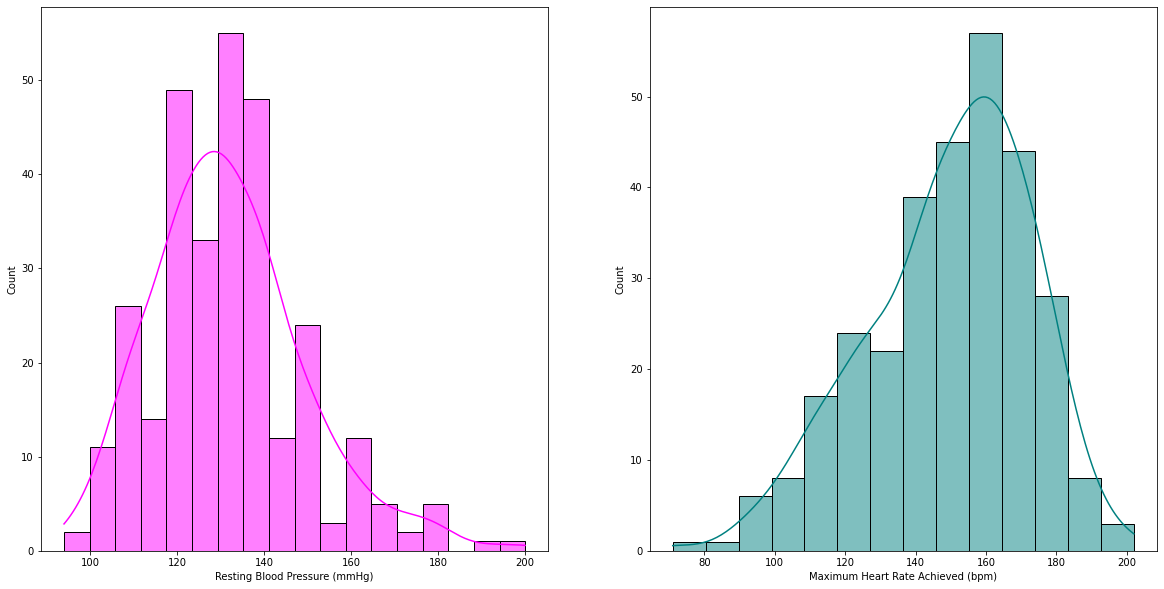

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(df['trtbps'], kde=True, color = 'magenta')
plt.xlabel("Resting Blood Pressure (mmHg)")
plt.subplot(1,2,2)
sns.histplot(df['thalachh'], kde=True, color = 'teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")

Text(0.5, 0, 'Cholestrol')

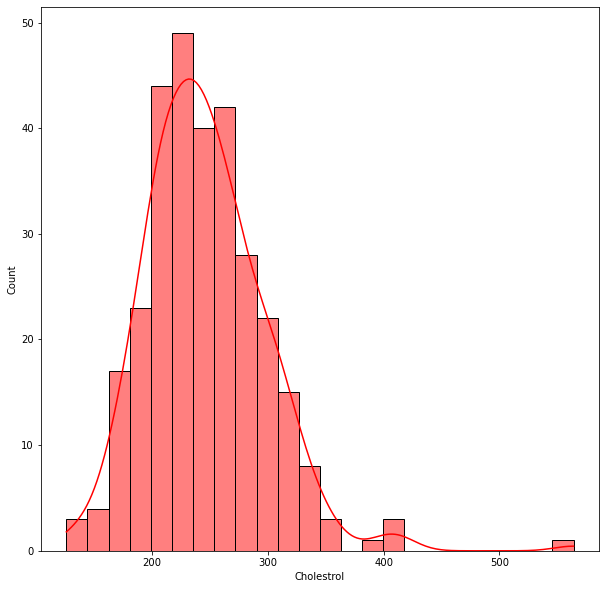

In [18]:
plt.figure(figsize=(10,10))
sns.histplot(df['chol'], kde=True, color = 'red')
plt.xlabel("Cholestrol")

#### We have done the Analysis of the data now let's have a look at out data

In [19]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  caa  output
0   63    1   3     145   233    1        0       150     0    0       1
1   37    1   2     130   250    0        1       187     0    0       1
2   41    0   1     130   204    0        0       172     0    0       1
3   56    1   1     120   236    0        1       178     0    0       1
4   57    0   0     120   354    0        1       163     1    0       1

### Let us do Standardisation

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scale=StandardScaler()

In [22]:
scale.fit(df)

StandardScaler()

In [23]:
df= scale.transform(df)

In [24]:
df=pd.DataFrame(df,columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'caa', 'output'])

In [25]:
df.head()

age       sex        cp    trtbps      chol       fbs   restecg  \
0  0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1 -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2 -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3  0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4  0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   

   thalachh      exng       caa    output  
0  0.015443 -0.696631 -0.714429  0.914529  
1  1.633471 -0.696631 -0.714429  0.914529  
2  0.977514 -0.696631 -0.714429  0.914529  
3  1.239897 -0.696631 -0.714429  0.914529  
4  0.583939  1.435481 -0.714429  0.914529

### We can insert this data into our ML Models

#### Then we will use the ensembling techniques

#### Let us split our data

In [26]:
x= df.iloc[:,:-1]
x

age       sex        cp    trtbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1   -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2   -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3    0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4    0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464 -1.468418 -0.938515  0.478391 -0.101730 -0.417635  0.898962   
299 -1.033002  0.681005  1.973123 -1.234996  0.342756 -0.417635  0.898962   
300  1.503641  0.681005 -0.938515  0.706843 -1.029353  2.394438  0.898962   
301  0.290464  0.681005 -0.938515 -0.092738 -2.227533 -0.417635  0.898962   
302  0.290464 -1.468418  0.032031 -0.092738 -0.198357 -0.417635 -1.005832   

     thalachh      exng       caa  
0    0.015443 -0.696631 -0.714429  
1    1.633471 -0.696631 -0.714429  
2    0.977514 -0.696631 -0.714429  
3    1.239897 -0.696631 -0.714429  
4    0.583939  1.435481 -0.714429  
..        ...       ...       ...  
298 -1.165281  1.435481 -0.714429  
299 -0.771706 -0.696631 -0.714429  
300 -0.378132 -0.696631  1.244593  
301 -1.515125  1.435481  0.265082  
302  1.064975 -0.696631  0.265082  

[303 rows x 10 columns]

In [27]:
y= np.array(df.iloc[:,-1:]).reshape(-1)
y

array([ 0.91452919,  0.91452919,  0.91452919,  0.91452919,  0.91452919,
        0.91452919,  0.91452919,  0.91452919,  0.91452919,  0.91452919,
        0.91452919,  0.91452919,  0.91452919,  0.91452919,  0.91452919,
        0.91452919,  0.91452919,  0.91452919,  0.91452919,  0.91452919,
        0.91452919,  0.91452919,  0.91452919,  0.91452919,  0.91452919,
        0.91452919,  0.91452919,  0.91452919,  0.91452919,  0.91452919,
        0.91452919,  0.91452919,  0.91452919,  0.91452919,  0.91452919,
        0.91452919,  0.91452919,  0.91452919,  0.91452919,  0.91452919,
        0.91452919,  0.91452919,  0.91452919,  0.91452919,  0.91452919,
        0.91452919,  0.91452919,  0.91452919,  0.91452919,  0.91452919,
        0.91452919,  0.91452919,  0.91452919,  0.91452919,  0.91452919,
        0.91452919,  0.91452919,  0.91452919,  0.91452919,  0.91452919,
        0.91452919,  0.91452919,  0.91452919,  0.91452919,  0.91452919,
        0.91452919,  0.91452919,  0.91452919,  0.91452919,  0.91

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
lbl= LabelEncoder()

In [32]:
encoded_y= lbl.fit_transform(y_train)

In [33]:
logreg= LogisticRegression()

In [34]:
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)


LogisticRegression()

In [35]:
y_pred=logreg.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [37]:
encoded_ytest= lbl.fit_transform(y_test)

In [38]:
Y_pred1 = logreg.predict(x_test)
lr_conf_matrix = confusion_matrix(encoded_ytest,Y_pred1 )
lr_acc_score = accuracy_score(encoded_ytest, Y_pred1)

In [39]:
lr_conf_matrix

array([[35,  9],
       [ 4, 43]], dtype=int64)

In [40]:
print(lr_acc_score*100,"%")

85.71428571428571 %


#### As we see the Logistic Regression Model have a 85% accuracy